# Optimization
In the context of machine learning, optimization refers to the process of finding the best set of model parameters that minimize (or maximize) a given objective function. The objective function can be the error between predicted and actual values.

Type of optimization
1. Unconstrained Optimization
2. Constrained Optimization

## Unconstrained Optimization
Unconstrained optimization refers to the process of finding the minimum or maximum of a function without any constraints on the variables. In this type of optimization, the objective function is subject to no restrictions, and the goal is to locate the global minimum or maximum (or possibly local extrema) within the entire feasible domain
 * Example: Minimize (or Maximize) f(x)

Where f(x) is the objective function, and x is a vector of variables to be optimized. The solution to an unconstrained optimization problem involves finding the values of x that minimize or maximize the function f(x) without considering any limitations on the values that x can take.

In machine learning, training a linear regression model involves an unconstrained optimization problem. The objective is to minimize the mean squared error between the predicted output and the actual target values. The model parameters (weights and biases) can take any real values, and there are no constraints on them during the optimization process.


## Constrained Optimization
Constrained optimization involves finding the minimum or maximum of a function subject to certain constraints on the variables. In this type of optimization, the objective function is optimized while satisfying a set of constraints, which define the feasible region. The feasible region is a subset of the entire variable space that satisfies all the constraints

* Example: Minimize (or Maximize) f(x)

Subject to: $g_i(x)$ ≤ 0 for i = 1, 2, ..., m,
            $h_j(x)$ = 0 for j = 1, 2, ..., p

Where f(x) is the objective function, x is the vector of variables, g_i(x) are inequality constraints, and h_j(x) are equality constraints. The goal is to find the values of x that optimize the objective function f(x) while satisfying all the constraints.


In machine learning, consider a support vector machine (SVM) for binary classification. The objective is to find the hyperplane that maximizes the margin between the two classes. However, we may want to impose a constraint on the SVM, such as limiting the sum of the weights' squares to a certain value (L2 regularization). This constraint prevents overfitting and leads to a better generalization of the model to unseen data.

## Brackting the mimimum
The basic idea of bracketing the minimum involves finding an interval (a bracket) in which the minimum is guaranteed to lie. This interval should contain the minimum and have certain properties, such as ensuring that the function is monotonically decreasing (or increasing) within the bracket. It is particularly useful when the function's analytical form is not known or when the function is expensive to evaluate.

The process of bracketing usually starts with an initial interval, and then it iteratively refines the interval by narrowing it down. At each step, the function is evaluated at certain points within the interval to determine the behavior of the function in that region. Based on the function evaluations, the algorithm updates the interval, reducing its size while still ensuring that it contains the minimum.






### Example
Sure! Let's consider a machine learning example where we want to find the minimum of a unimodal function using the bracketing technique.

Suppose we have the following unimodal function:

f(x) = x^2 - 6x + 5

Our goal is to find the minimum value of this function within a given interval [a, b].

Step 1: Bracketing
We start by selecting two initial points, a and b, within the interval [a, b]. We evaluate the function at these points to determine the behavior of the function in that region.

Let's choose a = 0 and b = 5 as our initial points:

f(a) = 0^2 - 6*0 + 5 = 5
f(b) = 5^2 - 6*5 + 5 = 0

Step 2: Narrowing down the interval
Based on the function evaluations, we can see that the function is decreasing from a to b. This means that the minimum value lies somewhere between a and b. We can now refine the interval by setting a new pair of points, a' and b', within the previous interval [a, b], such that a' < b'. One common way to do this is by using the golden ratio to divide the interval:

golden_ratio = (1 + √5) / 2 ≈ 1.618

a' = b - (b - a) / golden_ratio ≈ 3.09
b' = a + (b - a) / golden_ratio ≈ 1.91

Now, we evaluate the function at a' and b':

f(a') ≈ -0.18
f(b') ≈ 3.18

Step 3: Update the interval
Since f(a') < f(b') in this case, the minimum value is expected to be in the interval [a', b]. So, we update the interval as [a', b] and repeat the process by selecting a new pair of points within this updated interval.

We continue this iterative process until the interval becomes sufficiently small, and the difference between a and b is within a certain tolerance level.

By using the bracketing technique with the golden section search or similar methods, we can efficiently and accurately find the minimum value of the unimodal function f(x) = x^2 - 6x + 5 within the given interval.

### Python code for Bracketing the minimum
One common algorithm that uses the bracketing technique is the golden section search. It maintains an interval and divides it into smaller sub-intervals based on the golden ratio to ensure that the interval always contains the minimum.

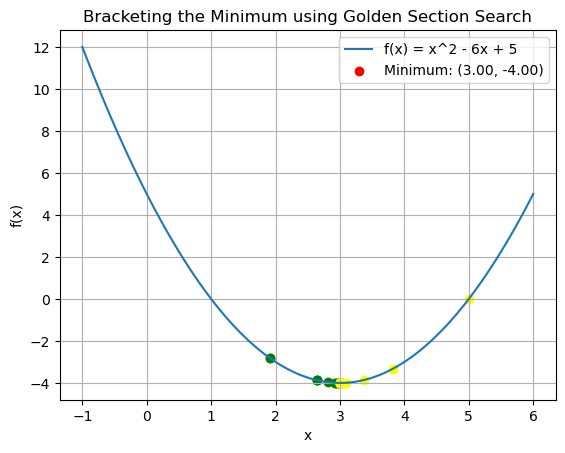

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unimodal function
def f(x):
    return x**2 - 6*x + 5

# Bracketing function using golden section search
def bracket_minimum(a, b, tol=1e-6):
    golden_ratio = (1 + np.sqrt(5)) / 2
    a_l=[]
    b_l=[]
    f_a=[]
    f_b=[]
    while abs(a - b) > tol:
        a_prime = b - (b - a) / golden_ratio
        b_prime = a + (b - a) / golden_ratio

        if f(a_prime) < f(b_prime):
            b = b_prime
        else:
            a = a_prime
        a_l.append(a)
        b_l.append(b)
    return (a + b) / 2, a_l, b_l

# Define the interval [a, b]
a = 0
b = 5

# Find the minimum using the bracketing technique
min_x, a_ll, b_ll = bracket_minimum(a, b)
a_ll=np.array(a_ll)
b_ll=np.array(b_ll)
# print(a_ll)
f_a_ll=f(a_ll)
f_b_ll=f(b_ll)
min_y = f(min_x)

# Plot the function and the minimum point
x_vals = np.linspace(a - 1, b + 1, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = x^2 - 6x + 5")
plt.scatter(min_x, min_y, color='red', label=f"Minimum: ({min_x:.2f}, {min_y:.2f})")
plt.scatter(a_ll, f_a_ll, color='green')
plt.scatter(b_ll, f_b_ll, color='yellow')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bracketing the Minimum using Golden Section Search')
plt.legend()
plt.grid(True)
plt.show()


### Multi variable example
This code defines the Rosenbrock function, performs the bracketing using the golden section search separately for both variables 'x' and 'y',

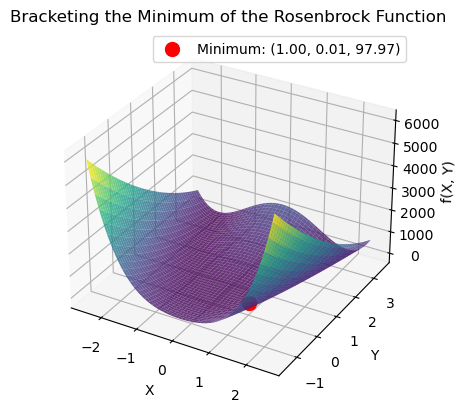

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Bracketing function using golden section search
def bracket_minimum_2d(a, b, tol=1e-6):
    golden_ratio = (1 + np.sqrt(5)) / 2

    while abs(a - b) > tol:
        a_prime = b - (b - a) / golden_ratio
        b_prime = a + (b - a) / golden_ratio

        if rosenbrock(a_prime, a_prime) < rosenbrock(b_prime, b_prime):
            b = b_prime
        else:
            a = a_prime

    return (a + b) / 2

# Define the interval [a, b] for both x and y
a_x, b_x = -2, 2
a_y, b_y = -1, 3

# Find the minimum using the bracketing technique
min_x, min_y = bracket_minimum_2d(a_x, b_x), bracket_minimum_2d(a_y, b_y)
min_z = rosenbrock(min_x, min_y)

# Create a 3D plot of the Rosenbrock function
x_vals = np.linspace(-2.5, 2.5, 100)
y_vals = np.linspace(-1.5, 3.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(min_x, min_y, min_z, color='red', s=100, label=f"Minimum: ({min_x:.2f}, {min_y:.2f}, {min_z:.2f})")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Bracketing the Minimum of the Rosenbrock Function')
ax.legend()
plt.show()


### Gradient and Hessian

* **Gradient**:
The gradient is a vector that points in the direction of the steepest ascent of a scalar-valued function. For a function f(x₁, x₂, ..., xₙ), the gradient ∇f is an n-dimensional vector, where the i-th component (∂f/∂xᵢ) represents the partial derivative of the function with respect to the i-th variable.
Geometrically, the gradient points in the direction of the steepest increase of the function at a given point. The magnitude of the gradient indicates the rate of increase of the function in that direction.

  In optimization, the gradient plays a crucial role in iterative algorithms like gradient descent, where it is used to update the parameters (variables) of a model to minimize (or maximize) the objective function.


* **Hessian Matrix**:
  The Hessian matrix is a square matrix of second partial derivatives of a scalar-valued function with respect to its variables. In mathematical terms, if we have a function f(x₁, x₂, ..., xₙ), the Hessian matrix H is an n x n matrix, where the (i, j)-th element is given by:

  Hᵢⱼ = ∂²f / ∂xᵢ∂xⱼ

  Here, ∂²f denotes the second partial derivative, and ∂xᵢ and ∂xⱼ represent the partial derivatives with respect to variables xᵢ and xⱼ, respectively.

  The Hessian matrix provides information about the curvature of the function at a given point. It characterizes how the function behaves in different directions around the critical point (where the gradient is zero).

  In optimization, the Hessian matrix is particularly useful in determining the convergence behavior of iterative optimization algorithms, especially those that use second-order information to find the optimal solution efficiently.

The main differences between the Hessian matrix and the gradient are

* The gradient is a vector that points in the direction of the steepest ascent (or descent) of the function.
* The Hessian matrix is a square matrix that provides information about the curvature of the function around a critical point.
* The gradient is used in many optimization algorithms to update the parameters iteratively.
* The Hessian matrix is used in second-order optimization methods to guide the search for the optimal solution more efficiently by considering curvature information.


### Hessian in Machine learing

1. Example:
In logistic regression, the goal is to find the optimal weights that maximize the likelihood function. Newton's method utilizes the gradient and the Hessian matrix of the likelihood function with respect to the model's parameters to determine the direction and the step size for parameter updates.

  Newton's method is a second-order optimization algorithm that uses the Hessian matrix to find the optimal solution more efficiently. It can converge to the minimum in fewer iterations than first-order methods like gradient descent.

2. Example:
In training neural networks with a large number of parameters, computing the exact Hessian can be computationally expensive. Quasi-Newton methods approximate the Hessian and use it to guide the parameter updates, making them more efficient for large-scale problems.

  Quasi-Newton methods, like the BFGS algorithm, approximate the Hessian matrix to achieve faster convergence without computing the exact Hessian at each iteration.


### Hessian and Eigenvalue

1. Positive-Definiteness (All Eigenvalues > 0):
If all eigenvalues of the Hessian matrix are positive, then the function is convex in the neighborhood of the critical point. In this case, the critical point is a local minimum. Moreover, if all eigenvalues are strictly positive, the function has a strict local minimum.

2. Negative-Definiteness (All Eigenvalues < 0):
If all eigenvalues of the Hessian matrix are negative, then the function is concave in the neighborhood of the critical point. In this case, the critical point is a local maximum. Moreover, if all eigenvalues are strictly negative, the function has a strict local maximum.

3. Indefiniteness (Some Eigenvalues > 0, Some < 0):
If the Hessian matrix has both positive and negative eigenvalues, the function exhibits saddle points in the neighborhood of the critical point. At a saddle point, the function decreases in certain directions and increases in other directions. These points are not minima nor maxima.

4. Zero Eigenvalues (Flat Directions):
If the Hessian matrix has one or more zero eigenvalues, it indicates that there are flat directions (or plateaus) around the critical point. In these directions, the function does not change, making it difficult for standard optimization methods to converge. Further analysis may be needed to determine the nature of the critical point in such cases.

Positive-Definiteness (All Eigenvalues > 0)

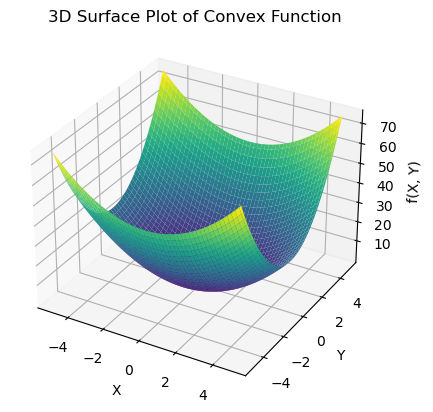

Eigenvalues at point [ 3. -2.]: [2. 4.]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the convex function (quadratic function)
def convex_function(x, y):
    return x**2 + 2*y**2

# Define the Hessian matrix of the convex function
def hessian(x, y):
    h_xx = 2
    h_xy = 0
    h_yx = 0
    h_yy = 4

    return np.array([[h_xx, h_xy], [h_yx, h_yy]])

# Create a meshgrid for plotting
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = convex_function(X, Y)

# Create a 3D plot of the convex function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Surface Plot of Convex Function')
plt.show()

# Choose a point to compute the eigenvalues of the Hessian
point = np.array([3.0, -2.0])
hess = hessian(point[0], point[1])

# Compute the eigenvalues of the Hessian
eigvals, _ = np.linalg.eig(hess)

# Print the eigenvalues in the console
print(f"Eigenvalues at point {point}: {eigvals}")


Negative-Definiteness (All Eigenvalues < 0)

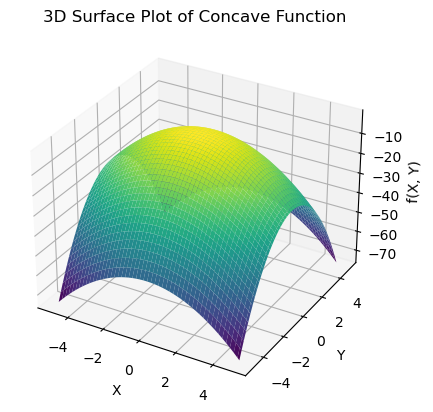

Eigenvalues at point [1. 2.]: [-2. -4.]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the concave function (negative of a quadratic function)
def concave_function(x, y):
    return -(x**2 + 2*y**2)

# Define the Hessian matrix of the concave function
def hessian(x, y):
    h_xx = -2
    h_xy = 0
    h_yx = 0
    h_yy = -4

    return np.array([[h_xx, h_xy], [h_yx, h_yy]])

# Create a meshgrid for plotting
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = concave_function(X, Y)

# Create a 3D plot of the concave function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Surface Plot of Concave Function')
plt.show()

# Choose a point to compute the eigenvalues of the Hessian
point = np.array([1.0, 2.0])
hess = hessian(point[0], point[1])

# Compute the eigenvalues of the Hessian
eigvals, _ = np.linalg.eig(hess)

# Print the eigenvalues in the console
print(f"Eigenvalues at point {point}: {eigvals}")


### Indefiniteness (Some Eigenvalues > 0, Some < 0)

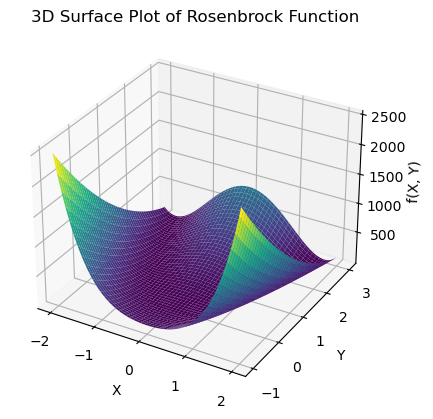

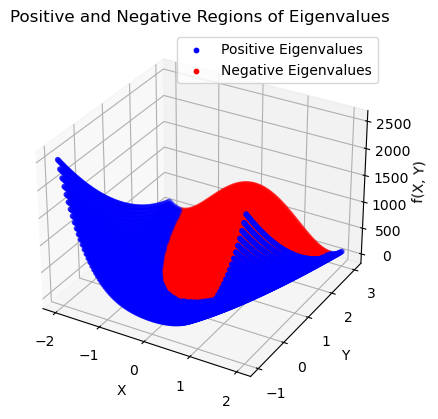

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Define the Hessian matrix of the Rosenbrock function
def hessian(x, y, a=1, b=100):
    h_xx = 2 - 4 * b * y + 12 * b * x**2
    h_xy = -4 * b * x
    h_yx = -4 * b * x
    h_yy = 2 * b

    return np.array([[h_xx, h_xy], [h_yx, h_yy]])

# Evaluate the eigenvalues at different points on the surface
def evaluate_eigenvalues():
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    positive_eigenvalues = []
    negative_eigenvalues = []

    for x, y in zip(X.flatten(), Y.flatten()):
        hess = hessian(x, y)
        eigvals, _ = np.linalg.eig(hess)

        if np.all(eigvals > 0):
            positive_eigenvalues.append((x, y))
        else:
            negative_eigenvalues.append((x, y))

    return np.array(positive_eigenvalues).T, np.array(negative_eigenvalues).T

# Plot the 3D surface of the Rosenbrock function
def plot_3d_surface():
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.set_title('3D Surface Plot of Rosenbrock Function')
    plt.show()

# Plot the positive and negative regions based on eigenvalues
def plot_positive_negative_regions():
    positive_eigenvalues, negative_eigenvalues = evaluate_eigenvalues()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(positive_eigenvalues[0], positive_eigenvalues[1], rosenbrock(*positive_eigenvalues), color='blue', s=10, label='Positive Eigenvalues')
    ax.scatter(negative_eigenvalues[0], negative_eigenvalues[1], rosenbrock(*negative_eigenvalues), color='red', s=10, label='Negative Eigenvalues')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.set_title('Positive and Negative Regions of Eigenvalues')
    ax.legend()
    plt.show()

# Plot the 3D surface of the Rosenbrock function
plot_3d_surface()

# Plot the positive and negative regions based on eigenvalues
plot_positive_negative_regions()


## Newton's method
Newton's method is an iterative optimization technique used to find the minimum (or maximum) of a function. It is a second-order optimization method, meaning it uses both the first derivative (gradient) and the second derivative (Hessian matrix) of the function to update the current estimate of the minimum in each iteration.

The update formula for Newton's method is as follows:
$x_{k+1}$ = $x_k$ - $[H(f(x_k))]^{-1} * ∇f(x_k)$

where:

1. $x_{k+1}$ is the updated estimate of the minimum in the (k+1)-th iteration.
2. $x_k$ is the current estimate of the minimum in the k-th iteration.
3. $H(f(x_k))$ is the Hessian matrix of the function evaluated at $x_k$.
4. $∇f(x_k)$ is the gradient of the function evaluated at $x_k$.

The main idea behind Newton's method is to use the Hessian matrix to approximate the local curvature of the function at the current estimate $x_k$. The method then updates the estimate by moving in the direction of steepest descent, where the rate of descent is adjusted based on the curvature information provided by the Hessian.




### Steps of Newton's method

1. Initialization: Choose an initial guess for the minimum, denoted as $x_0$.

2. Iteration: For each iteration k, do the following steps:

  a. Compute the value of the function at the current estimate:
  $f(x_k)$.

  b. Compute the gradient (first derivative) of the function at the current estimate:
  $∇f(x_k)$.

  c. Compute the Hessian matrix (second derivative) of the function at the current estimate:
  $H(f(x_k))$.

  d. Solve the linear system:
  $[H(f(x_k))] * δx = -∇f(x_k)$

  where δx is the update to the current estimate $x_k$.

  e. Update the estimate of the minimum:
  $x_{k+1} = x_k + δx$

3. Stopping Criterion: Check whether the change in the estimate from the previous iteration is small enough to stop the optimization. For example, you can stop when the norm of δx is below a certain tolerance level, or when the absolute difference between $f(x_{k+1})$ and $f(x_k)$ is small enough.

4. Convergence Check: Optionally, you can check whether the optimization has converged to a local minimum by evaluating the gradient of the function at the final estimate $x_{k+1}$. If the gradient is close to zero (i.e., $∇f(x_{k+1}) ≈ 0$), it indicates a potential minimum.

5. Termination: If the stopping criterion is not met, repeat the iteration steps (step 2) with the updated estimate $x_{k+1}$ as the new initial guess.

N itr:  0
N itr:  1
N itr:  2
N itr:  3
N itr:  4
GD itr:  0
GD itr:  1
GD itr:  2
GD itr:  3
GD itr:  4
GD itr:  5
GD itr:  6
GD itr:  7
GD itr:  8
GD itr:  9
GD itr:  10
GD itr:  11
GD itr:  12
GD itr:  13
GD itr:  14
GD itr:  15
GD itr:  16
GD itr:  17
GD itr:  18
GD itr:  19
GD itr:  20
GD itr:  21
GD itr:  22
GD itr:  23
GD itr:  24
GD itr:  25
GD itr:  26
GD itr:  27
GD itr:  28
GD itr:  29
GD itr:  30
GD itr:  31
GD itr:  32
GD itr:  33
GD itr:  34
GD itr:  35
GD itr:  36
GD itr:  37
GD itr:  38
GD itr:  39
GD itr:  40
GD itr:  41
GD itr:  42
GD itr:  43
GD itr:  44
GD itr:  45
GD itr:  46
GD itr:  47
GD itr:  48
GD itr:  49
GD itr:  50
GD itr:  51
GD itr:  52
GD itr:  53
GD itr:  54
GD itr:  55
GD itr:  56
GD itr:  57
GD itr:  58
GD itr:  59
GD itr:  60
GD itr:  61
GD itr:  62
GD itr:  63
GD itr:  64
GD itr:  65
GD itr:  66
GD itr:  67
GD itr:  68
GD itr:  69
GD itr:  70
GD itr:  71
GD itr:  72
GD itr:  73
GD itr:  74
GD itr:  75
GD itr:  76
GD itr:  77
GD itr:  78
GD itr:  79


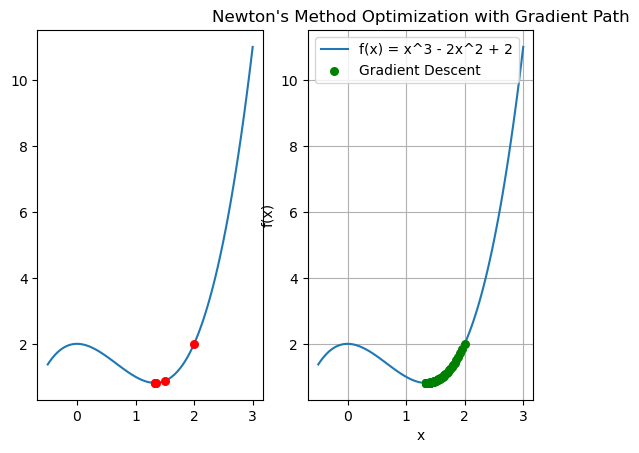

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x**3 - 2*x**2 + 2

# Define the derivative of f(x)
def df(x):
    return 3*x**2 - 4*x

# Define the second derivative of f(x)
def d2f(x):
    return 6*x - 4

def gradient_descent(x0, eta, max_iterations=100, tolerance=1e-6):
    x_values = [x0]

    for i in range(max_iterations):
        print("GD itr: ", i)
        x1 = x0 - eta * df(x0)
        x_values.append(x1)

        if abs(x1 - x0) < tolerance:
            break

        x0 = x1

    return x_values
# Newton's method optimization
def newtons_method(x0, max_iterations=100, tolerance=1e-6):
    x_values = [x0]

    for i in range(max_iterations):
        print("N itr: ", i)
        x1 = x0 - df(x0) / d2f(x0)
        x_values.append(x1)

        if abs(x1 - x0) < tolerance:
            break

        x0 = x1

    return x_values

# Perform Newton's method optimization starting from x0 = 2
x0 = 2
x_values = newtons_method(x0)
gd_x_vals=gradient_descent(x0, 0.01)
# Plot the function and the gradient path in every step
x_vals = np.linspace(-0.5, 3, 100)
y_vals = f(x_vals)
plt.subplot(1,2,1)
plt.plot(x_vals, y_vals, label='f(x) = x^3 - 2x^2 + 2')
plt.scatter(x_values, f(np.array(x_values)), c='red', label='Newtons method', s=30, zorder=5)

plt.subplot(1,2,2)
plt.plot(x_vals, y_vals, label='f(x) = x^3 - 2x^2 + 2')
plt.scatter(gd_x_vals, f(np.array(gd_x_vals)), c='green', label='Gradient Descent', s=30, zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Method Optimization with Gradient Path')
plt.legend()
plt.grid(True)
plt.show()


## Home Exercise
Perform Gradient descent on the function and plot the gradient path similar to Newtons method. also report how many iterations are required to perfom GD and Newtons method. Report Computation time.

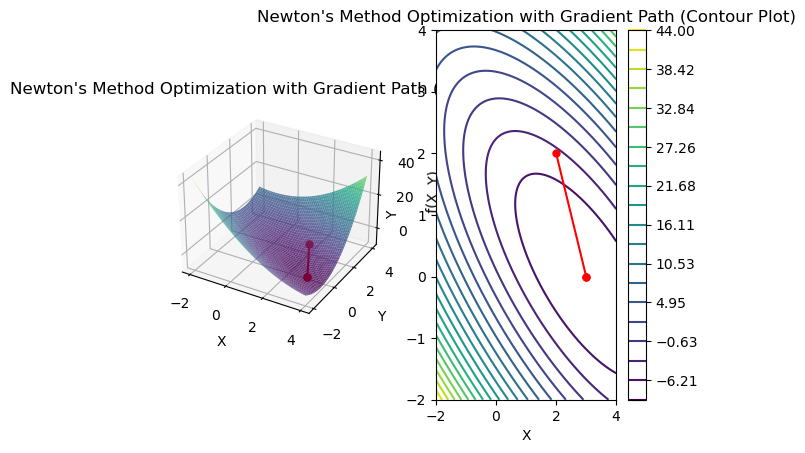

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y)
def f(x, y):
    return x**2 + 2*y**2 + 2*x*y - 6*x - 6*y

# Define the gradient of f(x, y)
def gradient(x, y):
    df_dx = 2*x + 2*y - 6
    df_dy = 4*y + 2*x - 6
    return np.array([df_dx, df_dy])

# Define the Hessian matrix of f(x, y)
def hessian(x, y):
    h_xx = 2
    h_xy = 2
    h_yx = 2
    h_yy = 4
    return np.array([[h_xx, h_xy], [h_yx, h_yy]])

# Newton's method optimization
def newtons_method(x0, y0, max_iterations=100, tolerance=1e-6):
    x_values = [x0]
    y_values = [y0]

    for i in range(max_iterations):
        grad = gradient(x0, y0)
        hess_inv = np.linalg.inv(hessian(x0, y0))
        delta = np.dot(hess_inv, grad)
        x1, y1 = x0 - delta[0], y0 - delta[1]
        x_values.append(x1)
        y_values.append(y1)

        if np.linalg.norm(delta) < tolerance:
            break

        x0, y0 = x1, y1

    return x_values, y_values

# Perform Newton's method optimization starting from (x0, y0) = (2, 2)
x0, y0 = 2, 2
x_values, y_values = newtons_method(x0, y0)

# Create a meshgrid for plotting
x_vals = np.linspace(-2, 4, 100)
y_vals = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Plot the surface plot with gradient path
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot(x_values, y_values, f(np.array(x_values), np.array(y_values)), color='red', marker='o', markersize=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Newton\'s Method Optimization with Gradient Path (Surface Plot)')

# Plot the contour plot with gradient path
ax2 = fig.add_subplot(122)
cp = ax2.contour(X, Y, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), cmap='viridis')
ax2.plot(x_values, y_values, color='red', marker='o', markersize=5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Newton\'s Method Optimization with Gradient Path (Contour Plot)')
plt.colorbar(cp)
plt.show()


### Gradient & Tangent Plane
The relationship between the gradient and the tangent plane lies in the fact that the gradient vector (∇f) is normal to the tangent plane. This means that the direction of the steepest increase of the function (the gradient) is perpendicular to the tangent plane at a given point.

The relationship between the gradient and the tangent plane is like this: The gradient vector points in the direction where the function increases the most. The tangent plane, being flat, is perpendicular (at a right angle) to the gradient vector. This means that if you want to climb up the surface (in the direction of the gradient), you need to walk in a direction that is horizontal on the tangent plane.



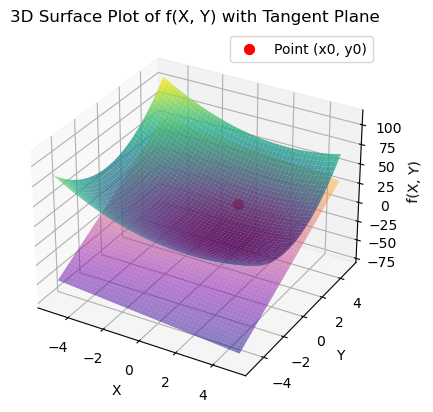

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y)
def f(x, y):
    return x**2 + 2*y**2 - 4*x + 2*y + 1

# Define the gradient of f(x, y)
def gradient(x, y):
    df_dx = 2*x - 4
    df_dy = 4*y + 2
    return np.array([df_dx, df_dy])

# Define the tangent plane at a specific point (x0, y0)
def tangent_plane(x0, y0):
    z0 = f(x0, y0)
    df_dx, df_dy = gradient(x0, y0)
    return lambda x, y: z0 + df_dx * (x - x0) + df_dy * (y - y0)

# Create a meshgrid for plotting
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Choose a specific point to visualize the tangent plane
x0, y0 = 1, 2
Z_tangent = tangent_plane(x0, y0)(X, Y)

# Plot the 3D surface plot of the function and the tangent plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot_surface(X, Y, Z_tangent, cmap='plasma', alpha=0.5)
ax.scatter(x0, y0, f(x0, y0), color='red', s=50, label='Point (x0, y0)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Surface Plot of f(X, Y) with Tangent Plane')
ax.legend()
plt.show()
